<ipython-input-21-ba08638c4d27>:18: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(df['Formatted Date']), df['Temperature (C)'], label='Temperature (C)')


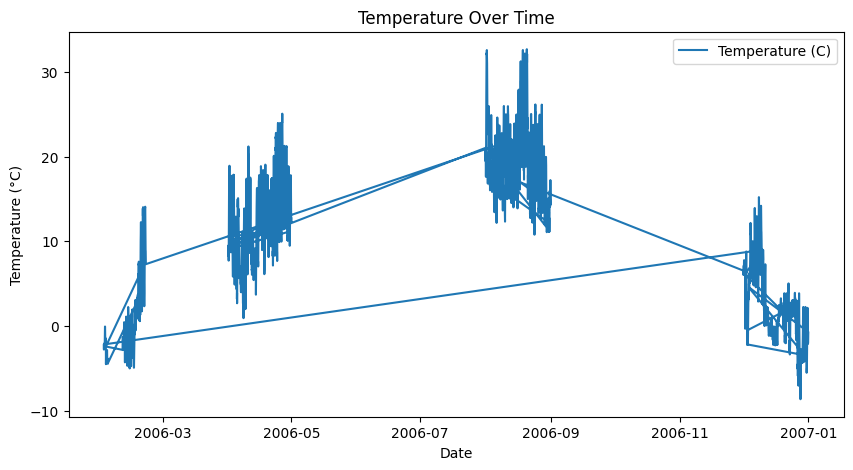

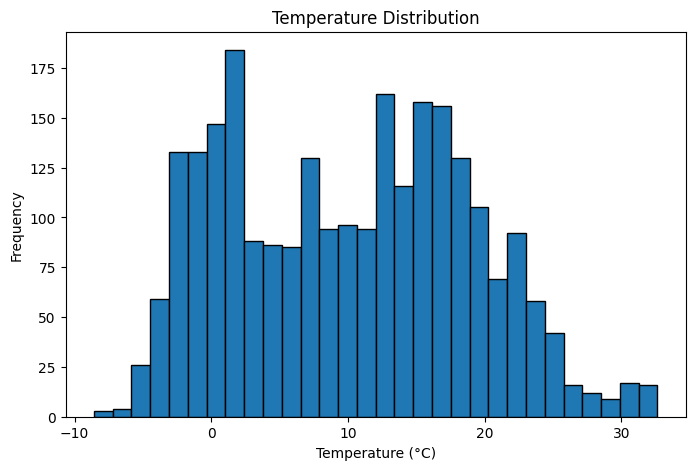

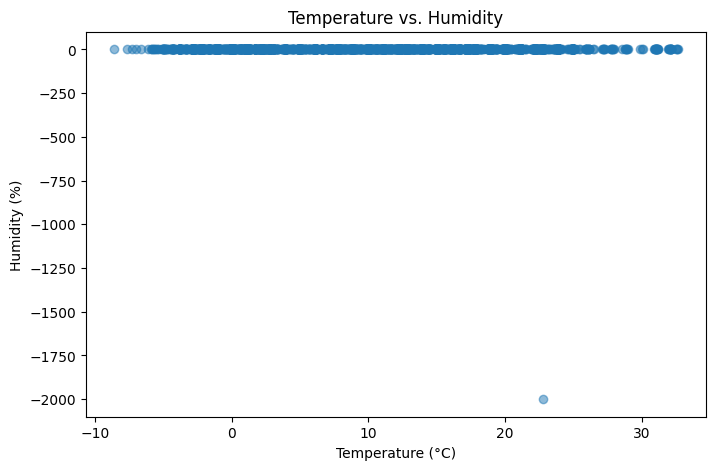

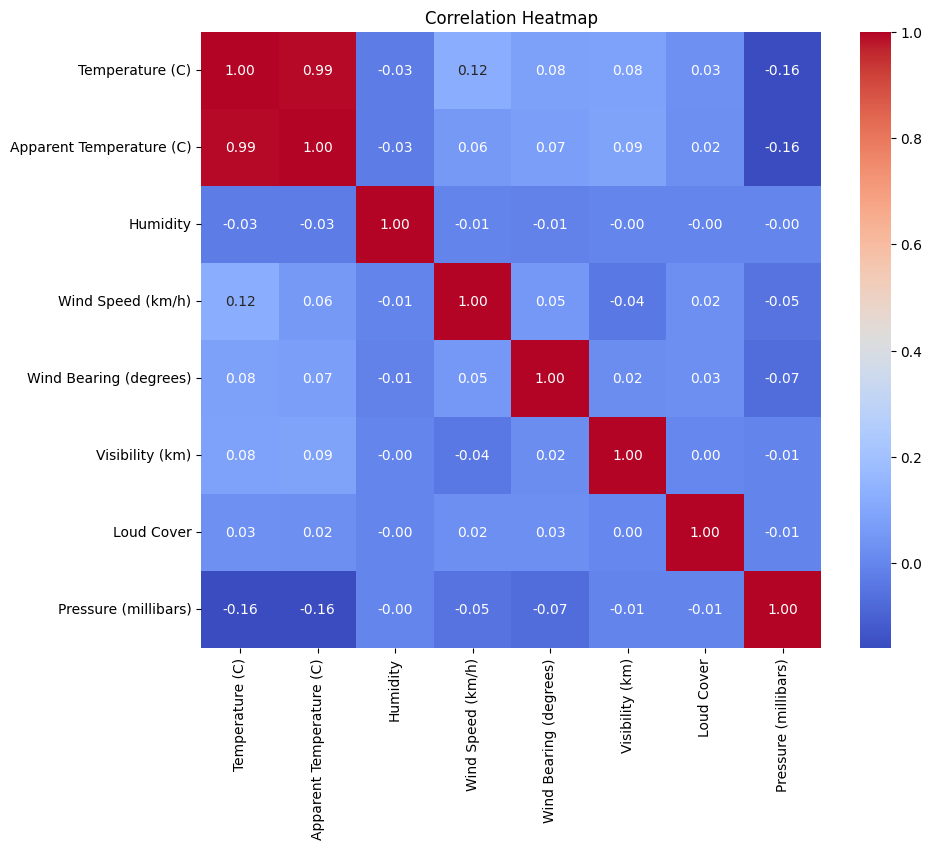

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset

df = pd.read_csv('/content/Weather Dataset.csv')
df.head()
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
non_numeric_cols = df.select_dtypes(exclude=np.number).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna('Unknown')
df.drop_duplicates(inplace=True)
df = df[(df['Temperature (C)'] >= -100) & (df['Temperature (C)'] <= 100)]
df.describe()

plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['Formatted Date']), df['Temperature (C)'], label='Temperature (C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

#histogram of temperature distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Temperature (C)'], bins=30, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

#scatter plot of temperature vs. humidity
plt.figure(figsize=(8, 5))
plt.scatter(df['Temperature (C)'], df['Humidity'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity')
plt.show()


numeric_df = df.select_dtypes(include=np.number)
# Generate a correlation heatmap of the dataset

numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
